# Pydantic with gemini

In [66]:
from dotenv import load_dotenv
import os
from google import genai

load_dotenv()

client = genai.Client(api_key=os.getenv("GOOGLE_API_KEY"))
# os.getenv("Gemini_API_KEY")
response = client.models.generate_content(model = "gemini-2.5-flash", contents = "Tell me 5 jokes about italian football")
print(response.text)


Here are 5 jokes about Italian football:

1.  **What's an Italian football coach's favorite number?**
    One. Because that's all they need to score before defending for 89 minutes!

2.  **Why did the Italian player bring a resume to the match?**
    Because every time he goes down in the box, he's auditioning for an Oscar!

3.  **What do Italian fans do during the World Cup when Italy isn't playing?**
    They watch old replays of 2006 and pretend it's live!

4.  **An Italian coach walks into a bar after a terrible loss.**
    The bartender asks, "What happened?" The coach sighs, "We had the possession, we had the chances... but the referee clearly wasn't Italian!"

5.  **Why are Italian grandmothers the best football commentators?**
    Because they can complain about the referee, critique the tactics, and offer you a freshly baked cannoli all in the same breath!


In [19]:
response = client.models.generate_content(
    model = "gemini-2.5-flash", contents = """
    You are a helpful assistant. I need you to create a JSON object representing a library. 
    The library's name should be 'Calcio Library' with the theme of the best Serie players in the period of 1985-2005, 
    and have the fields name and books that contains a list of book. 
    Each book should have a 'title', 'author', and 'year' field. Make sure the output is a single, valid JSON object. 
    Give me 10 books. Remove ``` json and ´´´ from the output
   
"""
)

response.text

'{\n  "name": "Calcio Library",\n  "books": [\n    {\n      "title": "Maldini: The Captain\'s Legacy",\n      "author": "Luca Caioli",\n      "year": 2003\n    },\n    {\n      "title": "The Divine Ponytail: Baggio\'s Odyssey",\n      "author": "Gabriele Marcotti",\n      "year": 2000\n    },\n    {\n      "title": "Maradona: King of Naples",\n      "author": "Vincenzo D\'Angelo",\n      "year": 1990\n    },\n    {\n      "title": "Van Basten: The Swan of Utrecht",\n      "author": "Sandro Piccinini",\n      "year": 1994\n    },\n    {\n      "title": "Baresi: The Milan Wall",\n      "author": "Riccardo Cucchi",\n      "year": 1998\n    },\n    {\n      "title": "Del Piero: Fantasista Forever",\n      "author": "Maurizio Crosetti",\n      "year": 2004\n    },\n    {\n      "title": "Batistuta: The Lion King",\n      "author": "Andrea Sorrentino",\n      "year": 2001\n    },\n    {\n      "title": "Zidane in Turin: The Maestro\'s Italian Years",\n      "author": "Philippe Auclair",\n   

In [20]:
print(response.text)

{
  "name": "Calcio Library",
  "books": [
    {
      "title": "Maldini: The Captain's Legacy",
      "author": "Luca Caioli",
      "year": 2003
    },
    {
      "title": "The Divine Ponytail: Baggio's Odyssey",
      "author": "Gabriele Marcotti",
      "year": 2000
    },
    {
      "title": "Maradona: King of Naples",
      "author": "Vincenzo D'Angelo",
      "year": 1990
    },
    {
      "title": "Van Basten: The Swan of Utrecht",
      "author": "Sandro Piccinini",
      "year": 1994
    },
    {
      "title": "Baresi: The Milan Wall",
      "author": "Riccardo Cucchi",
      "year": 1998
    },
    {
      "title": "Del Piero: Fantasista Forever",
      "author": "Maurizio Crosetti",
      "year": 2004
    },
    {
      "title": "Batistuta: The Lion King",
      "author": "Andrea Sorrentino",
      "year": 2001
    },
    {
      "title": "Zidane in Turin: The Maestro's Italian Years",
      "author": "Philippe Auclair",
      "year": 2002
    },
    {
      "title": "I

## Pydantic to validate the simulated data

In [46]:
from pydantic import BaseModel, Field

from datetime import datetime

class Book(BaseModel):
    title: str
    author: str
    year: int = Field(gt = 1985, lt = datetime.now().year)
    
class Library(BaseModel):
    name: str
    books: list[Book]
    
library= Library.model_validate_json(response.text)
library

Library(name='Calcio Library', books=[Book(title="Maldini: The Captain's Legacy", author='Luca Caioli', year=2003), Book(title="The Divine Ponytail: Baggio's Odyssey", author='Gabriele Marcotti', year=2000), Book(title='Maradona: King of Naples', author="Vincenzo D'Angelo", year=1990), Book(title='Van Basten: The Swan of Utrecht', author='Sandro Piccinini', year=1994), Book(title='Baresi: The Milan Wall', author='Riccardo Cucchi', year=1998), Book(title='Del Piero: Fantasista Forever', author='Maurizio Crosetti', year=2004), Book(title='Batistuta: The Lion King', author='Andrea Sorrentino', year=2001), Book(title="Zidane in Turin: The Maestro's Italian Years", author='Philippe Auclair', year=2002), Book(title="Il Fenomeno: Ronaldo's Inter Legacy", author='Giancarlo Padovan', year=2000), Book(title='Totti: The Roman King', author='Marco Evangelisti', year=2005)])

In [37]:
library.name

'Calcio Library'

In [38]:
library.books

[Book(title="Maldini: The Captain's Legacy", author='Luca Caioli', year=2003),
 Book(title="The Divine Ponytail: Baggio's Odyssey", author='Gabriele Marcotti', year=2000),
 Book(title='Maradona: King of Naples', author="Vincenzo D'Angelo", year=1990),
 Book(title='Van Basten: The Swan of Utrecht', author='Sandro Piccinini', year=1994),
 Book(title='Baresi: The Milan Wall', author='Riccardo Cucchi', year=1998),
 Book(title='Del Piero: Fantasista Forever', author='Maurizio Crosetti', year=2004),
 Book(title='Batistuta: The Lion King', author='Andrea Sorrentino', year=2001),
 Book(title="Zidane in Turin: The Maestro's Italian Years", author='Philippe Auclair', year=2002),
 Book(title="Il Fenomeno: Ronaldo's Inter Legacy", author='Giancarlo Padovan', year=2000),
 Book(title='Totti: The Roman King', author='Marco Evangelisti', year=2005)]

In [41]:
library.books[2]

Book(title='Maradona: King of Naples', author="Vincenzo D'Angelo", year=1990)

In [43]:
library.books[1].title, library.books[1].year

("The Divine Ponytail: Baggio's Odyssey", 2000)

In [53]:
titles = [book.title for book in library.books]
titles

["Maldini: The Captain's Legacy",
 "The Divine Ponytail: Baggio's Odyssey",
 'Maradona: King of Naples',
 'Van Basten: The Swan of Utrecht',
 'Baresi: The Milan Wall',
 'Del Piero: Fantasista Forever',
 'Batistuta: The Lion King',
 "Zidane in Turin: The Maestro's Italian Years",
 "Il Fenomeno: Ronaldo's Inter Legacy",
 'Totti: The Roman King']

In [54]:
years = [book.year for book in library.books]
years

[2003, 2000, 1990, 1994, 1998, 2004, 2001, 2002, 2000, 2005]

In [56]:
above_1994 = [(book.title, book.year) for book in library.books if book.year > 1994]
above_1994

[("Maldini: The Captain's Legacy", 2003),
 ("The Divine Ponytail: Baggio's Odyssey", 2000),
 ('Baresi: The Milan Wall', 1998),
 ('Del Piero: Fantasista Forever', 2004),
 ('Batistuta: The Lion King', 2001),
 ("Zidane in Turin: The Maestro's Italian Years", 2002),
 ("Il Fenomeno: Ronaldo's Inter Legacy", 2000),
 ('Totti: The Roman King', 2005)]

In [57]:
library

Library(name='Calcio Library', books=[Book(title="Maldini: The Captain's Legacy", author='Luca Caioli', year=2003), Book(title="The Divine Ponytail: Baggio's Odyssey", author='Gabriele Marcotti', year=2000), Book(title='Maradona: King of Naples', author="Vincenzo D'Angelo", year=1990), Book(title='Van Basten: The Swan of Utrecht', author='Sandro Piccinini', year=1994), Book(title='Baresi: The Milan Wall', author='Riccardo Cucchi', year=1998), Book(title='Del Piero: Fantasista Forever', author='Maurizio Crosetti', year=2004), Book(title='Batistuta: The Lion King', author='Andrea Sorrentino', year=2001), Book(title="Zidane in Turin: The Maestro's Italian Years", author='Philippe Auclair', year=2002), Book(title="Il Fenomeno: Ronaldo's Inter Legacy", author='Giancarlo Padovan', year=2000), Book(title='Totti: The Roman King', author='Marco Evangelisti', year=2005)])

In [59]:
library.model_dump()

{'name': 'Calcio Library',
 'books': [{'title': "Maldini: The Captain's Legacy",
   'author': 'Luca Caioli',
   'year': 2003},
  {'title': "The Divine Ponytail: Baggio's Odyssey",
   'author': 'Gabriele Marcotti',
   'year': 2000},
  {'title': 'Maradona: King of Naples',
   'author': "Vincenzo D'Angelo",
   'year': 1990},
  {'title': 'Van Basten: The Swan of Utrecht',
   'author': 'Sandro Piccinini',
   'year': 1994},
  {'title': 'Baresi: The Milan Wall',
   'author': 'Riccardo Cucchi',
   'year': 1998},
  {'title': 'Del Piero: Fantasista Forever',
   'author': 'Maurizio Crosetti',
   'year': 2004},
  {'title': 'Batistuta: The Lion King',
   'author': 'Andrea Sorrentino',
   'year': 2001},
  {'title': "Zidane in Turin: The Maestro's Italian Years",
   'author': 'Philippe Auclair',
   'year': 2002},
  {'title': "Il Fenomeno: Ronaldo's Inter Legacy",
   'author': 'Giancarlo Padovan',
   'year': 2000},
  {'title': 'Totti: The Roman King',
   'author': 'Marco Evangelisti',
   'year': 2005}

In [60]:
library.model_dump_json()

'{"name":"Calcio Library","books":[{"title":"Maldini: The Captain\'s Legacy","author":"Luca Caioli","year":2003},{"title":"The Divine Ponytail: Baggio\'s Odyssey","author":"Gabriele Marcotti","year":2000},{"title":"Maradona: King of Naples","author":"Vincenzo D\'Angelo","year":1990},{"title":"Van Basten: The Swan of Utrecht","author":"Sandro Piccinini","year":1994},{"title":"Baresi: The Milan Wall","author":"Riccardo Cucchi","year":1998},{"title":"Del Piero: Fantasista Forever","author":"Maurizio Crosetti","year":2004},{"title":"Batistuta: The Lion King","author":"Andrea Sorrentino","year":2001},{"title":"Zidane in Turin: The Maestro\'s Italian Years","author":"Philippe Auclair","year":2002},{"title":"Il Fenomeno: Ronaldo\'s Inter Legacy","author":"Giancarlo Padovan","year":2000},{"title":"Totti: The Roman King","author":"Marco Evangelisti","year":2005}]}'

In [62]:
with open("library.json", "w") as json_file:
    json_file.write(library.model_dump_json(indent=4))

Create pandas dataframe

In [64]:
import pandas as pd

titels = [book.title for book in library.books]
years = [book.year for book in library.books]
authors = [book.author for book in library.books]

df = pd.DataFrame({"title": titles, "year": years, "author": authors})
df

,title,year,author
0,Maldini: The Captain's Legacy,2003,Luca Caioli
1,The Divine Ponytail: Baggio's Odyssey,2000,Gabriele Marcotti
2,Maradona: King of Naples,1990,Vincenzo D'Angelo
3,Van Basten: The Swan of Utrecht,1994,Sandro Piccinini
4,Baresi: The Milan Wall,1998,Riccardo Cucchi
5,Del Piero: Fantasista Forever,2004,Maurizio Crosetti
6,Batistuta: The Lion King,2001,Andrea Sorrentino
7,Zidane in Turin: The Maestro's Italian Years,2002,Philippe Auclair
8,Il Fenomeno: Ronaldo's Inter Legacy,2000,Giancarlo Padovan
9,Totti: The Roman King,2005,Marco Evangelisti


<Axes: ylabel='Frequency'>

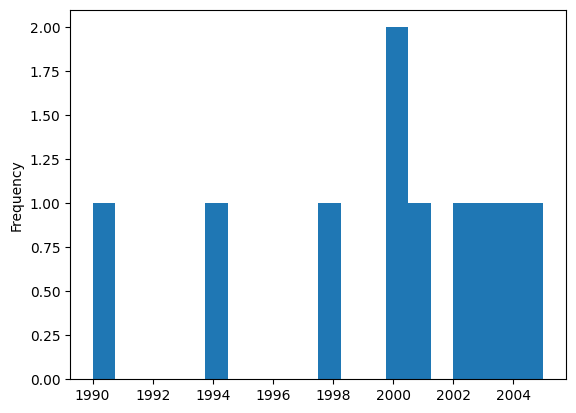

In [65]:
df.year.plot(kind = "hist", bins=20)